In [48]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# metricas usadas para classificacao
from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import RFE

import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
colunas = ["idx",
           "clump_thickness",            
           "uniformity_cell_size",    
           "uniformity_cell_shape",   
           "marginal_adhesion",          
           "single_epithelial_cell_size",
           "bare_nuclei",                
           "bland_chromatin",            
           "normal_nucleoli",            
           "mitoses",                    
           "class"]

dados = pd.read_csv('./breast-cancer-wisconsin.data', header=None, names = colunas)
dados.head()

,idx,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [24]:
dados['maligno'] = pd.get_dummies(dados['class'], drop_first=True)
dados = dados.drop('class', axis=1)
dados

,idx,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,maligno
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,0
695,841769,2,1,1,1,2,1,1,1,1,0
696,888820,5,10,10,3,7,3,8,10,2,1
697,897471,4,8,6,4,3,4,10,6,1,1


In [25]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   idx                          699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   uniformity_cell_size         699 non-null    int64 
 3   uniformity_cell_shape        699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   single_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  maligno                      699 non-null    uint8 
dtypes: int64(9), object(1), uint8(1)
memory usage: 55.4+ KB


In [26]:
# removendo as linhas com dados faltantes
dados = dados.replace({'?': np.nan})
dados = dados.dropna()

# separando os dados
X = dados.drop(['idx', 'maligno'], axis = 1)
y = np.array(dados['maligno'])
X_std = StandardScaler().fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state=10)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [28]:
_cm = pd.crosstab(y_test, y_pred, margins=True).reset_index()
_cm.drop('row_0', axis=1, inplace=True)
_cm.columns = ["Predito benigno", "Predito maligno", "All"]
_cm.index = ["Verdadeiro benigno", "Verdadeiro maligno", "All"]
_cm

,Predito benigno,Predito maligno,All
Verdadeiro benigno,87,2,89
Verdadeiro maligno,3,45,48
All,90,47,137


In [29]:
# Usamos a estrutura dataframe da biblioteca pandas para melhor apresentar a matriz de confusao
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["Predito benigno","Predito maligno",],
             index  =["Verdadeiro benigno", "Verdadeiro maligno"])
cm

,Predito benigno,Predito maligno
Verdadeiro benigno,87,2
Verdadeiro maligno,3,45


<AxesSubplot:>

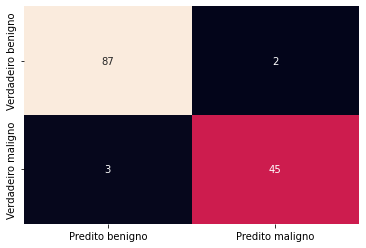

In [30]:
sns.heatmap(data=cm, annot=True, cbar=False)

In [31]:
def get_metrics(data_frame):
    TN = data_frame.iloc[0,0]
    TP = data_frame.iloc[1,1]
    FP = data_frame.iloc[0,1]
    FN = data_frame.iloc[1,0]
    
    acuracia = (TP + TN)/(TP+TN+FP+FN)
    precisao = TP/(TP+FP)
    especificidade = TN/(TN+FP)
    sensitividade = TP/(TP+FN)
    
    return { 
            "acuracia": acuracia,
            "precisao": precisao,
            "especificidade": precisao,
            "sensitividade": precisao
            }

In [32]:
metrics = get_metrics(cm)
metrics

{'acuracia': 0.9635036496350365,
 'precisao': 0.9574468085106383,
 'especificidade': 0.9574468085106383,
 'sensitividade': 0.9574468085106383}

In [39]:
# separando os dados
X2 = dados.drop(['idx', 'maligno'], axis = 1)
y2 = dados['maligno']
X2_std = StandardScaler().fit_transform(X2)

lr2 = LogisticRegression(random_state=42)
selector2 = RFE(estimator=lr2, n_features_to_select=3, step=1)
selector2 = selector2.fit(X2_std, y2)

X2 = X2[X2.columns[selector2.support_]]
X2_std = StandardScaler().fit_transform(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_std, y2, test_size = 0.2, random_state=10)

lr2.fit(X2_train, y2_train)
y2_pred = lr2.predict(X2_test)

In [40]:
X2.columns

Index(['clump_thickness', 'uniformity_cell_shape', 'bare_nuclei'], dtype='object')

In [42]:
# _cm2 = pd.crosstab(y2_test, y2_pred, margins=True).reset_index()
# _cm2.drop('row_0', axis=1, inplace=True)
# _cm2.columns = ["Predito benigno", "Predito maligno", "All"]
# _cm2.index = ["Verdadeiro benigno", "Verdadeiro maligno", "All"]
# _cm2

In [43]:
cm2 = pd.DataFrame(confusion_matrix(y2_test, y2_pred), 
             columns=["Predito benigno","Predito maligno",],
             index  =["Verdadeiro benigno", "Verdadeiro maligno"])
cm2

,Predito benigno,Predito maligno
Verdadeiro benigno,88,1
Verdadeiro maligno,2,46


In [44]:
metrics2 = get_metrics(cm2)
print(metrics2)
print(metrics)

{'acuracia': 0.9781021897810219, 'precisao': 0.9787234042553191, 'especificidade': 0.9787234042553191, 'sensitividade': 0.9787234042553191}
{'acuracia': 0.9635036496350365, 'precisao': 0.9574468085106383, 'especificidade': 0.9574468085106383, 'sensitividade': 0.9574468085106383}


In [45]:
lr2.fit(X2_train, y2_train)
print(lr2.intercept_, lr2.coef_)

[-0.95464826] [[1.56753061 1.96522768 1.80774216]]


<AxesSubplot:>

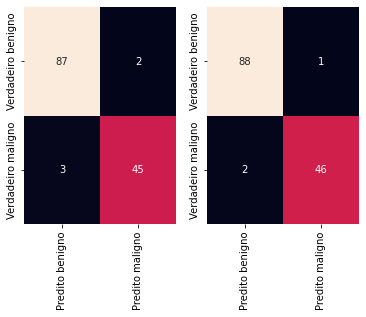

In [49]:
plt.subplot(1,2,1)
sns.heatmap(data=cm, annot=True, cbar=False)

plt.subplot(1,2,2)
sns.heatmap(data=cm2, annot=True, cbar=False)